# Getting Started With Statistical Analysis

##### A lot of data science is rooted in statistics, so we'll explore some basic statistical techniques that data scientists use as they explore data in preparation for machine learning modeling.

# Descriptive statistics and Data Distribution

##### The starting point for this exploration is often to visualize the data as a Histogram and see how frequently each value for the variable occurs.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
df = pd.read_csv('grades.csv')
df


,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0
5,Vicky,1.00,3.0
6,Frederic,11.50,53.0
7,Jimmie,9.00,42.0
8,Rhonda,8.50,26.0
9,Giovanni,14.50,74.0


In [2]:
df.isnull().sum()

Name          0
StudyHours    1
Grade         2
dtype: int64

In [3]:
df.isnull().sum().sum()

3

In [4]:
df = df.dropna(axis=0, how="any")

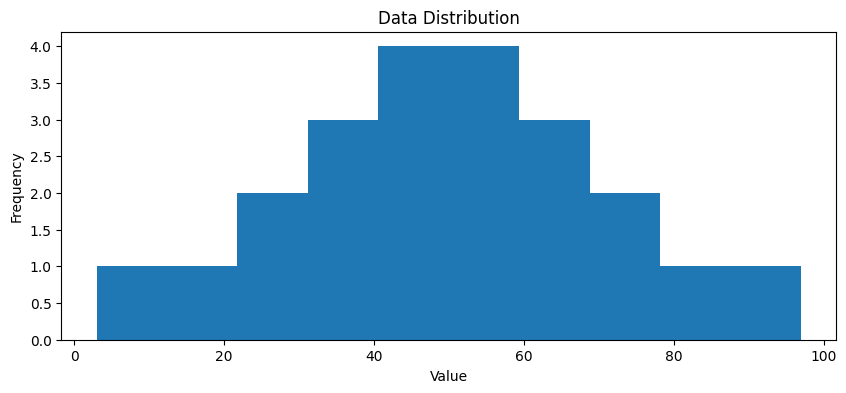

In [5]:
# Get the variable to examine
var_data = df['Grade']

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.hist(var_data)

# Add titles and labels
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the figure
plt.show()

##### The histogram for grades is a symmetric shape, where the most frequently occurring grades tend to be in the middle of the range (around 50), with fewer grades at the extreme ends of the scale.

# Measures of central tendency

##### To understand the distribution better, we can examine so-called measures of central tendency, which is a fancy way of describing statistics that represent the "middle" of the data. Common ways to define the middle of the data include: **The mean**, **The median** and  **The mode**. Let's calculate these values, along with the *minimum* and *maximum* values for comparison, and show them on the histogram.

##### *Of course, in some sample sets, there might be a tie for the most common value. In those cases, the dataset is described as bimodal or even multimodal.*

Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



C:\Users\hp\AppData\Local\Temp\ipykernel_14504\1262448967.py:42: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


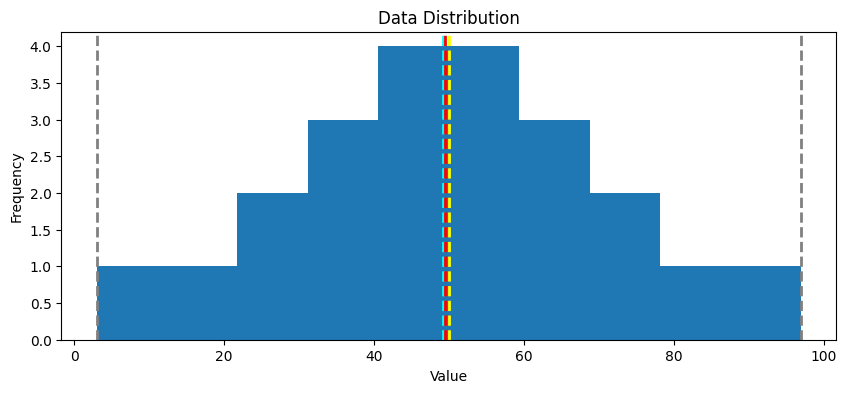

In [6]:
# Get the variable to examine
var = df['Grade']

# Get statistics
min_val = var.min()
max_val = var.max()
mean_val = var.mean()
med_val = var.median()
mod_val = var.mode()[0]

#The :.2f format specifier ensures that the values are displayed with two decimal places.

print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                        mean_val,
                                                                                        med_val,
                                                                                        mod_val,
                                                                                        max_val))

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.hist(var)

# Add lines for the statistics. The axvline function in Matplotlib is used to draw a vertical line across the axes of a plot 
plt.axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
plt.axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
plt.axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
plt.axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
plt.axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

#The axhline function draws a horizontal line across the axes at a specified y-coordinate. e.g
#plt.axhline(y='5', color='black', linestyle='dashed', linewidth=2)


# Add titles and labels
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the figure
fig.show()

##### Another way to visualize the distribution of a variable is to use a box plot (sometimes called a box-and-whiskers plot). Let's create one for the grade data.

C:\Users\hp\AppData\Local\Temp\ipykernel_14504\3628640597.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


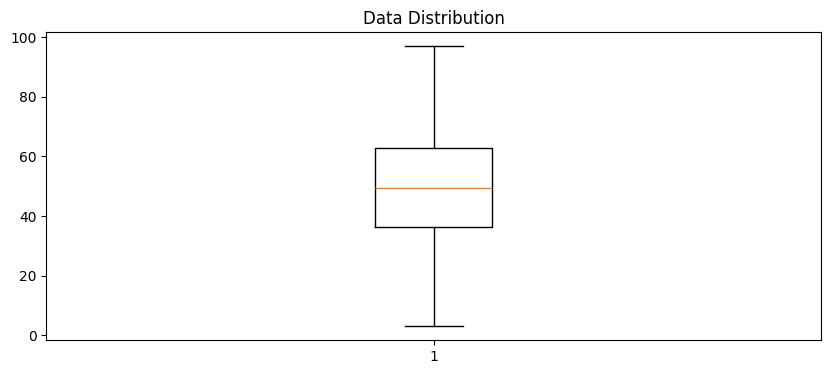

In [7]:
# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a boxplot
plt.boxplot(var)

# Add titles and labels
plt.title('Data Distribution')

# Show the figure
fig.show()

##### The box plot shows the distribution of the grade values in a format different from the histogram. The box part of the plot shows where the inner two quartiles of the data reside. In this case, half of the grades are between approximately 36 and 63. The whiskers extending from the box show the outer two quartiles, so the other half of the grades in this case are between 0 and 36 or 63 and 100. The line in the box indicates the median value.

Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



C:\Users\hp\AppData\Local\Temp\ipykernel_14504\2646135778.py:40: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


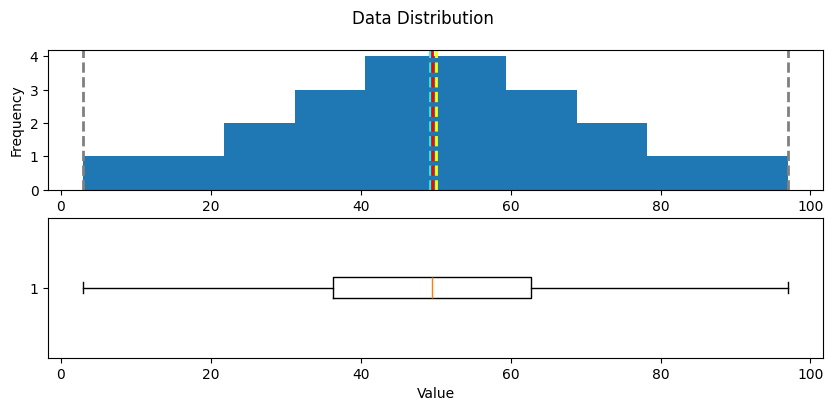

In [8]:
# Create a function that we can re-use. In python, when defining a function , the parameter name (like var_data in this case) is a placeholder. This placeholder represents any data you pass to the function when you actually call it.
def show_distribution(var_data):
    from matplotlib import pyplot as plt #Importing it here makes the function self-contained so you can call show_distribution without needing to import pyplot each time outside the function.

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column). ax is an array of axes (subplots), where ax[0] refers to the first plot (histogram)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot. vert=True (default) means the boxplot is plotted vertically on the y-axis. vert=False means the boxplot is plotted horizontally along the x-axis.   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()

# Get the variable to examine. col is the variable (data) that will be passed to the show_distribution function.
col = df['Grade']
# Call the function
show_distribution(col)

##### To explore this distribution in more detail, you need to understand that statistics is fundamentally about taking samples of data and using probability functions to extrapolate information about the full population of data.

##### If we have enough samples, we can calculate something called a probability density function, which estimates the distribution of grades for the full population.

##### The **pyplot** class from Matplotlib provides a helpful plot function to show this **density**.

Note: you may need to restart the kernel to use updated packages.


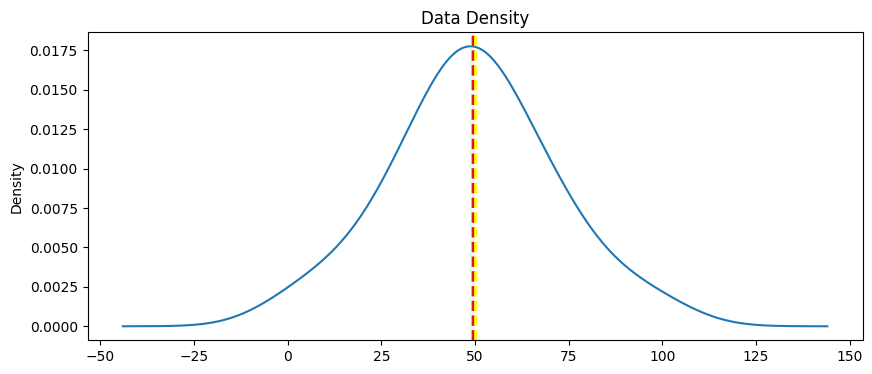

Kurtosis of Data: 3.0401598903390505
Skewness of Data: 0.03765176843269823


In [9]:
#The density plot relies on scipy's gaussian_kde function to calculate the kernel density estimate. Without scipy, the plot.density() method from pandas cannot create the density plot.
%pip install scipy


def show_density(var_data):
    from matplotlib import pyplot as plt
    from scipy.stats import kurtosis, skew

    fig = plt.figure(figsize=(10,4))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title('Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    plt.show()

    #calculate kurtosis and skewness. fisher=False function uses the "Pearson definition" of kurtosis, where the kurtosis of a normal distribution is 3. Kurtosis >3 is Leptokurtic i.e sharp peak while Kurtosis < 3 is Platykurtic i.e lighter tails than normal and Kurtosis = 3 Mesokurtic similar to a normal distribution.
    kurt_var_data = kurtosis(var_data, fisher=False)
    skew_var_data = skew(var_data)

    print(f"Kurtosis of Data: {kurt_var_data}")
    print(f"Skewness of Data: {skew_var_data}")



# Get the density of Grade
col = df['Grade']
show_density(col)

##### As expected from the histogram of the sample, the density shows the characteristic "bell curve" of what statisticians call a normal distribution with the mean and mode at the center and symmetric tails.

Minimum:1.00
Mean:10.52
Median:10.00
Mode:9.00
Maximum:16.00



C:\Users\hp\AppData\Local\Temp\ipykernel_14504\2646135778.py:40: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


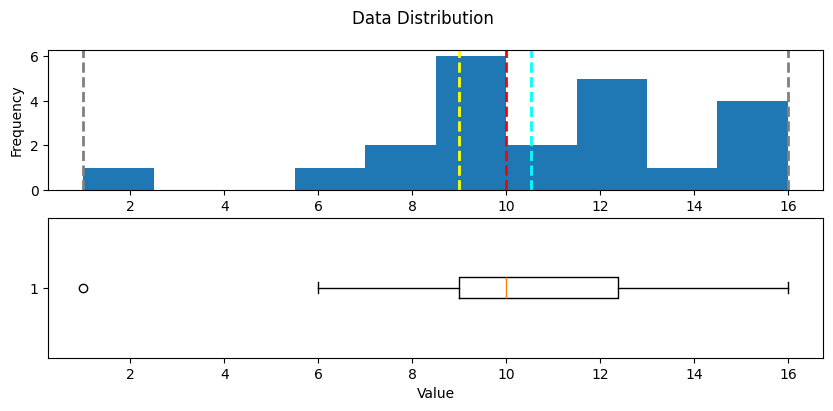

In [10]:
#  Distribution of the study hours data
Std = df['StudyHours']
# Call the function
show_distribution(Std)

##### Note that the whiskers of the box plot only begin at around 6.0, indicating that the vast majority of the first quarter of the data is above this value. The minimum is marked with an o, indicating that it is statistically an outlier. 

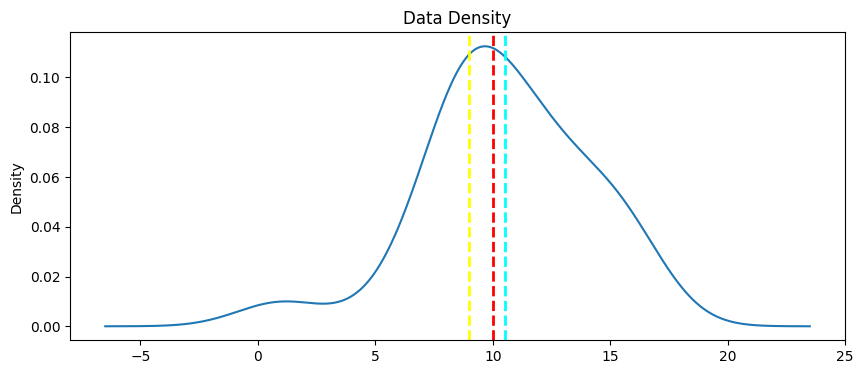

Kurtosis of Data: 3.8043432927282907
Skewness of Data: -0.5625315098433985


In [11]:
show_density(Std)

#####  Let's see what the distribution looks like without the outlier.

Minimum:6.00
Mean:10.98
Median:10.00
Mode:9.00
Maximum:16.00



C:\Users\hp\AppData\Local\Temp\ipykernel_14504\2646135778.py:40: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


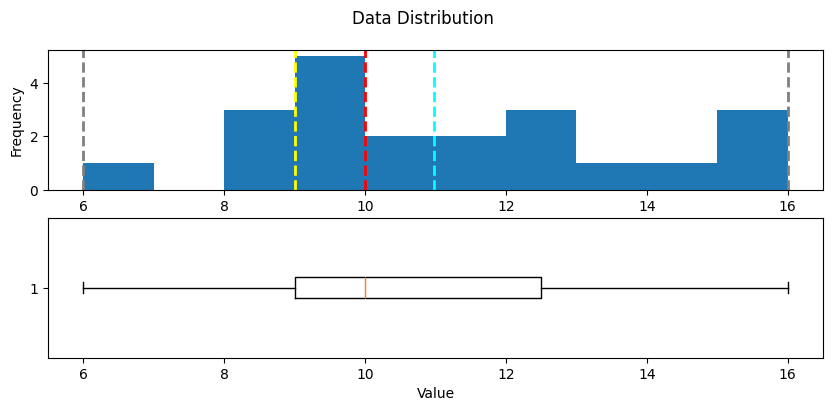

In [12]:
# We will only get students who have studied more than one hour
std = df[df.StudyHours>1]['StudyHours']
# Call the function
show_distribution(std)

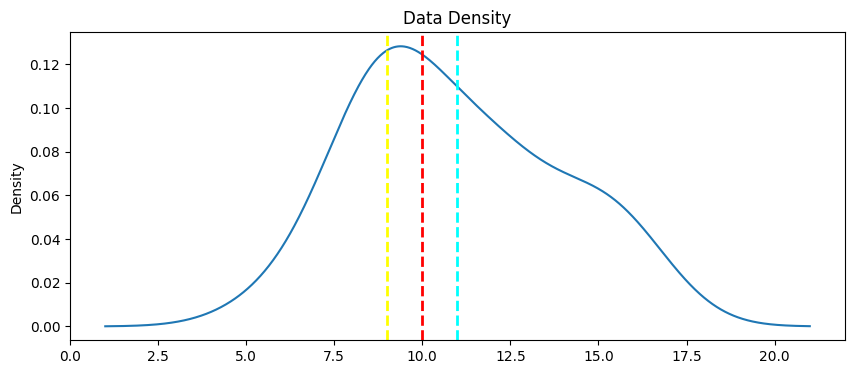

Kurtosis of Data: 2.102856828960834
Skewness of Data: 0.34755415139140355


In [13]:
show_density(std)

### This kind of distribution is called right skewed. The mass of the data is on the left side of the distribution, creating a long tail to the right because of the values at the extreme high end, which pull the mean to the right.

##### It easier to consider outliers as being values that fall below or above percentiles within which most of the data lie. For example, the following code uses the Pandas quantile function to exclude observations below the 0.01th percentile (the value above which 99% of the data reside).

Minimum:6.00
Mean:10.98
Median:10.00
Mode:9.00
Maximum:16.00



C:\Users\hp\AppData\Local\Temp\ipykernel_14504\2646135778.py:40: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


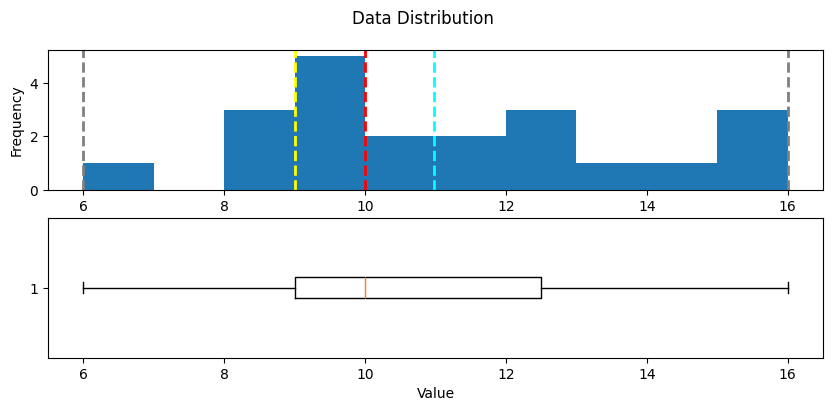

In [14]:
# calculate the 0.01th percentile. This means that if you were to rank all the students by the number of hours they studied, 1% of them studied less than or equal to this number, while 99% studied more.
q01 = df.StudyHours.quantile(0.01)

# Get the variable to examine
SH = df[df.StudyHours>q01]['StudyHours']
# Call the function
show_distribution(SH)

##### Tip: You can also eliminate outliers at the upper end of the distribution by defining a threshold at a high percentile value. For example, you could use the quantile function to find the 0.99 percentile, below which 99% of the data reside.

# Measures of variance

##### There's another aspect of the distributions we should examine: how much variability is there in the data?
##### Typical statistics that measure variability in the data include:

##### Range: The difference between the maximum and minimum. There's no built-in function for this, but it's easy to calculate using the min and max functions.
##### Variance: The average of the squared difference from the mean. You can use the built-in var function to find this.
##### Standard Deviation: The square root of the variance. You can use the built-in std function to find this.

In [15]:
for col_name in ['Grade','StudyHours']:
    col = df[col_name]
    rng = col.max() - col.min()
    var = col.var()
    std = col.std()
    print('\n{}:\n - Range: {:.2f}\n - Variance: {:.2f}\n - Std.Dev: {:.2f}'.format(col_name, rng, var, std))


Grade:
 - Range: 94.00
 - Variance: 472.54
 - Std.Dev: 21.74

StudyHours:
 - Range: 15.00
 - Variance: 12.16
 - Std.Dev: 3.49


##### Of these statistics, the standard deviation is generally the most useful. The higher the standard deviation, the more variance there is when comparing values in the distribution to the distribution mean; in other words, the data is more spread out. When working with a normal distribution, the standard deviation works with the particular characteristics of a normal distribution to provide even greater insight. Run the following cell to see the relationship between standard deviations and the data in the normal distribution.

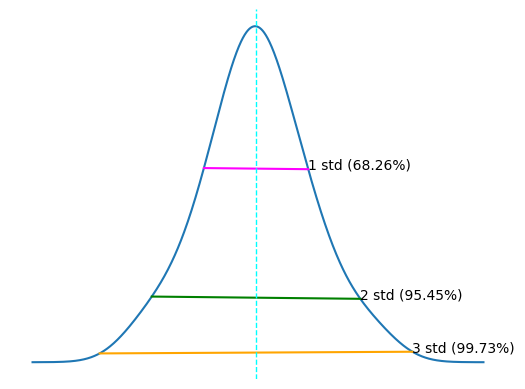

In [16]:
#scipy.stats provides functions to perform statistical calculations.
import scipy.stats as stats

# Get the Grade column
col = df['Grade']

# Estimate the Kernel density of the data using stats.gaussian_kde(). KDE is a method for estimating the probability density function of a continuous random variable, helping to visualize the distribution shape. Here, you're actually creating a KDE object rather than a static value. This KDE object can then be used as a callable function to get the estimated density at any specified points. 
density = stats.gaussian_kde(col)

# This line plots the density of col using pandas plotting. 
col.plot.density()

# Get the mean and standard deviation
s = col.std()
m = col.mean()

# This line creates a list x1 representing one standard deviation from the mean (both above and below). This range mean+- one standard deviation covers about 68.26% of normally distributed data, helping visualize this distribution property. 
x1 = [m-s, m+s]
y1 = density(x1) #This line calculates the density values for x1 on the KDE curve. It evaluates the density at each value in x1, giving the corresponnding y-values on the density plot for one standard deviation from the mean. 
plt.plot(x1,y1, color='magenta') #This line plots a line segment on the KDE curve between the points [m-s, m+s]
plt.annotate('1 std (68.26%)', (x1[1],y1[1])) #This line adds an annotation at the end of the one-standard-deviation line, labeling it "1std (68.26%)" to indicate that roughly 68.26% of data in a normal distribution falls within this range. 

# Annotate 2 stdevs
x2 = [m-(s*2), m+(s*2)]
y2 = density(x2) #density callable object used here.
plt.plot(x2,y2, color='green')
plt.annotate('2 std (95.45%)', (x2[1],y2[1]))

# Annotate 3 stdevs
x3 = [m-(s*3), m+(s*3)]
y3 = density(x3)
plt.plot(x3,y3, color='orange')
plt.annotate('3 std (99.73%)', (x3[1],y3[1]))

# Show the location of the mean
plt.axvline(col.mean(), color='cyan', linestyle='dashed', linewidth=1)

plt.axis('off') #This line hides the plot's axis, removing the x and y axis labels and ticks for a cleaner appearance.

plt.show()

##### The horizontal lines show the percentage of data within one, two, and three standard deviations of the mean (plus or minus). In any normal distribution: Approximately 68.26% of values fall within one standard deviation from the mean. Approximately 95.45% of values fall within two standard deviations from the mean. Approximately 99.73% of values fall within three standard deviations from the mean.

##### So, because we know that the mean grade is 49.18, the standard deviation is 21.74, and distribution of grades is approximately normal, we can calculate that 68.26% of students should achieve a grade between 27.44 and 70.92. i.e 49.18+21.74 and 49.18-21.74

### There's a built-in describe method of the DataFrame object that returns the main descriptive statistics for all numeric columns.

In [17]:
df.describe()

,StudyHours,Grade
count,22.000000,22.000000
mean,10.522727,49.181818
std,3.487144,21.737912
min,1.000000,3.000000
25%,9.000000,36.250000
50%,10.000000,49.500000
75%,12.375000,62.750000
max,16.000000,97.000000


# Comparing data

In [18]:
##### Get rid of outliers 
df_sample = df[df['StudyHours']>1]
df_sample

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0
6,Frederic,11.50,53.0
7,Jimmie,9.00,42.0
8,Rhonda,8.50,26.0
9,Giovanni,14.50,74.0
10,Francesca,15.50,82.0


In [19]:
passes = (df['Grade']>=60)
df_sample = pd.concat([df,passes.rename("Pass")], axis=1)
df_sample

,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False
5,Vicky,1.00,3.0,False
6,Frederic,11.50,53.0,False
7,Jimmie,9.00,42.0,False
8,Rhonda,8.50,26.0,False
9,Giovanni,14.50,74.0,True


# Comparing numeric and categorical variables

##### The data includes two numeric variables (StudyHours and Grade) and two categorical variables (Name and Pass). Let's start by comparing the numeric StudyHours column to the categorical Pass column to see if there's an apparent relationship between the number of hours studied and a passing grade. To make this comparison, let's create box plots showing the distribution of StudyHours for each possible Pass value (true and false).

<Axes: title={'center': 'StudyHours'}, xlabel='Pass'>

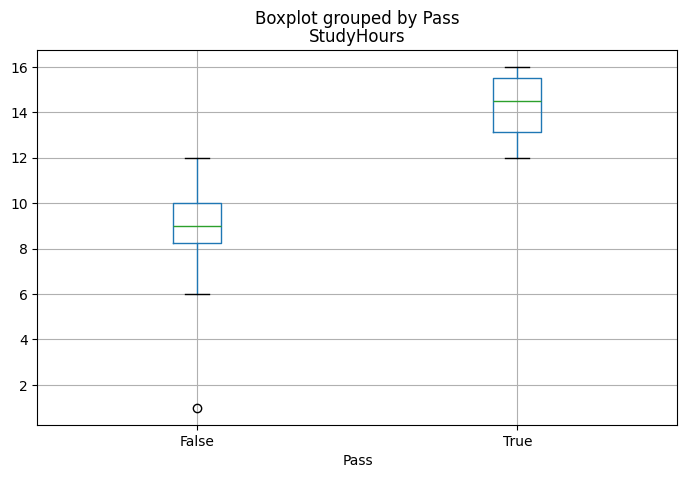

In [20]:
df_sample.boxplot(column='StudyHours', by='Pass', figsize=(8,5))

##### Comparing the StudyHours distributions, it's immediately apparent that students who passed the course tended to study for more hours than students who didn't. So if you wanted to predict whether or not a student is likely to pass the course, the amount of time they spend studying may be a good predictive indicator.

# Comparing numeric variables

##### create a bar chart that shows both grade and study hours.

<Axes: xlabel='Name'>

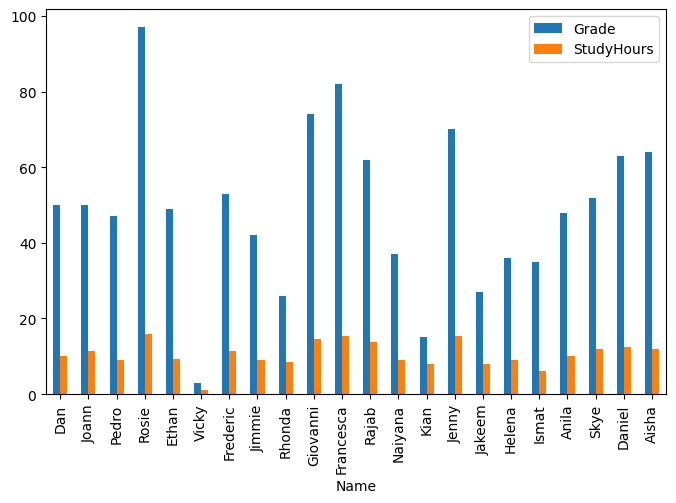

In [21]:
# Create a bar plot of name vs grade and study hours
df_sample.plot(x='Name', y=['Grade','StudyHours'], kind='bar', figsize=(8,5))

##### The chart shows bars for both grade and study hours for each student, but it's not easy to compare because the values are on different scales. A grade is measured in grade points (and ranges from 3 to 97), and study time is measured in hours (and ranges from 1 to 16).

##### A common technique when dealing with numeric data in different scales is to normalize the data so that the values retain their proportional distribution but are measured on the same scale. To accomplish this, we'll use a technique called MinMax scaling that distributes the values proportionally on a scale of 0 to 1. You could write the code to apply this transformation, but the Scikit-Learn library provides a scaler to do it for you.

<Axes: xlabel='Name'>

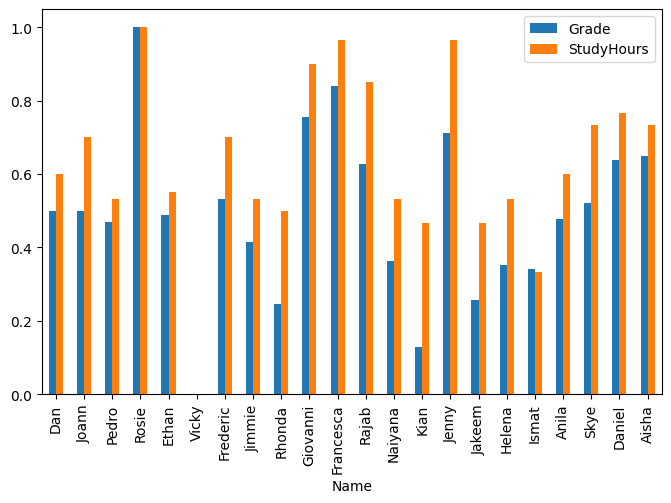

In [22]:
from sklearn.preprocessing import MinMaxScaler

# Get a scaler object
scaler = MinMaxScaler()

# This line creates a copy of the original DataFrame (df_sample) with only the specified columns: 'Name', 'Grade', and 'StudyHours'.
df_normalized = df_sample[['Name', 'Grade', 'StudyHours']].copy()

# Normalize the numeric columns. The reason we specify df_normalized[['Grade', 'StudyHours']] instead of just df_normalized is that we only want to scale (normalize) specific numeric columns ('Grade' and 'StudyHours') within the DataFrame, not the entire DataFrame. If we used df_normalized, it would try to scale all columns in the DataFrame, including 'Name'. This would result in an error because MinMaxScaler only works with numeric data. The fit_transform method both fits the scaler to the data and transforms it. The scaler calculates the minimum and maximum values in each column and then applies a transformation to scale each value to a [0, 1] range.
df_normalized[['Grade','StudyHours']] = scaler.fit_transform(df_normalized[['Grade','StudyHours']])

# Plot the normalized values
df_normalized.plot(x='Name', y=['Grade','StudyHours'], kind='bar', figsize=(8,5))

##### With the data normalized, it's easier to see an apparent relationship between grade and study time. It's not an exact match, but it definitely seems like students with higher grades tend to have studied more. So there seems to be a correlation between study time and grade. In fact, there's a statistical correlation measurement we can use to quantify the relationship between these columns.

In [23]:
df_normalized.Grade.corr(df_normalized.StudyHours)

0.9254280509006746

##### In this case, the correlation value is close to 1, showing a strongly positive correlation between study time and grade.

##### Another way to visualize the apparent correlation between two numeric columns is to use a scatter plot.

<Axes: title={'center': 'Study Time vs Grade'}, xlabel='StudyHours', ylabel='Grade'>

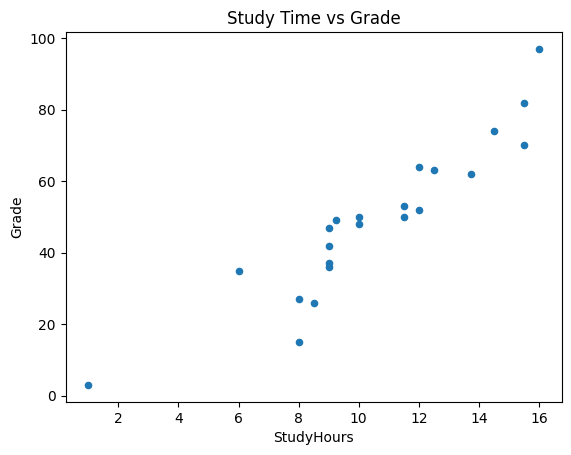

In [24]:
# Create a scatter plot
df_sample.plot.scatter(title='Study Time vs Grade', x='StudyHours', y='Grade')

##### We can see this more clearly by adding a regression line (or a line of best fit) to the plot that shows the general trend in the data. To do this, we'll use a statistical technique called least squares regression.

##### y=mx+c; The difference between the original y (Grade) value and the new y value is the error between our regression line and the actual Grade achieved by the student. Our goal is to calculate the slope and intercept for a line with the lowest overall error. Specifically, we define the overall error by taking the error for each point, squaring it, and adding all the squared errors together. The line of best fit is the line that gives us the lowest value for the sum of the squared errors, hence the name least squares regression.

##### The **SciPy** package includes a stats class that provides a **linregress** method to do the hard work for you. This returns (among other things) the coefficients you need for the slope equation: slope (m) and intercept (b) based on a given pair of variable samples you want to compare.

slope: 5.7689
y-intercept: -11.5224
 correlation coefficient:0.9254 
 p-value: 0.0000
so...
 f(x) = 5.7689x + -11.5224


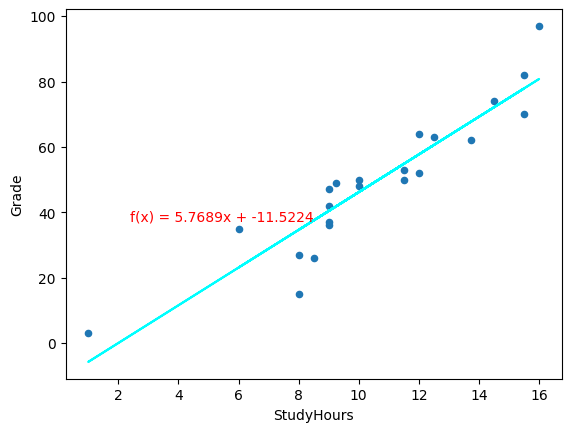

In [25]:
from scipy import stats

#
df_regression = df_sample[['Grade', 'StudyHours']].copy()

# Get the regression slope and intercept. This line calculates the regression statistics by calling stats.linregress with StudyHours as the independent variable (x) and Grade as the dependent variable (y). linregress returns m: the slope, b:the y-intercept, r:correlation coefficient, p: p-value for the hypothesis test that there is a significant linear relationship, se: standard error of the slope
m, b, r, p, se = stats.linregress(df_regression['StudyHours'], df_regression['Grade'])
print('slope: {:.4f}\ny-intercept: {:.4f}\n correlation coefficient:{:.4f} \n p-value: {:.4f}'.format(m,b,r,p))
print('so...\n f(x) = {:.4f}x + {:.4f}'.format(m,b))

# This line calculates the predicted Grade values based on the regression line equation. It creates a new column 'fx' in df_regression, storing these predicted values.
df_regression['fx'] = (m * df_regression['StudyHours']) + b

# Calculate the error between f(x) and the actual y (Grade) value
df_regression['error'] = df_regression['fx'] - df_regression['Grade']

# Create a scatter plot of Grade vs StudyHours
df_regression.plot.scatter(x='StudyHours', y='Grade')

# Plot the regression line based on the StudyHours (x-axis) and fx(predicted Grade values, y axis).
plt.plot(df_regression['StudyHours'],df_regression['fx'], color='cyan')

#Choose a midpoint for placing the equation on the regression line
x_mid = (df_regression['StudyHours'].min()+df_regression['StudyHours'].max()) /2
y_mid = m* x_mid + b #Calculates the corresponding y value on the regression line at x_mid which is x i.e. (y=mx+c)

plt.annotate("f(x) = {:.4f}x + {:.4f}".format(m,b), xy=(x_mid, y_mid), color='red', ha='right')

# Display the plot
plt.show()

In [26]:
# Show the original x,y values, the f(x) value, and the error
df_regression[['StudyHours', 'Grade', 'fx', 'error']]

,StudyHours,Grade,fx,error
0,10.00,50.0,46.166274,-3.833726
1,11.50,50.0,54.819575,4.819575
2,9.00,47.0,40.397406,-6.602594
3,16.00,97.0,80.779481,-16.220519
4,9.25,49.0,41.839623,-7.160377
5,1.00,3.0,-5.753538,-8.753538
6,11.50,53.0,54.819575,1.819575
7,9.00,42.0,40.397406,-1.602594
8,8.50,26.0,37.512972,11.512972
9,14.50,74.0,72.126179,-1.873821


# Using the regression coefficients for prediction

##### Now that you have the regression coefficients for the study time and grade relationship, you can use them in a function to estimate the expected grade for a given amount of study.

In [27]:
# Define a function based on our regression coefficients
def f(x):
    m = 6.3134
    b = -17.9164
    return m*x + b

study_time = 14

# Get f(x) for study time
prediction = f(study_time)

# Grade can't be less than 0 or more than 100. min(100, prediction): This part ensures the grade does not exceed 100. If prediction is greater than 100, this sets the grade to 100. max(0, ...): This ensures the grade does not go below 0. If prediction is negative, this sets the grade to 0. The result is stored in expected_grade, providing a predicted grade that respects a 0-100 grading scale.
expected_grade = max(0,min(100,prediction))

#Print the estimated grade
print ('Studying for {} hours per week may result in a grade of {:.0f}'.format(study_time, expected_grade))

Studying for 14 hours per week may result in a grade of 70


##### This technique is, in fact, the basic premise of machine learning. You can take a set of sample data that includes one or more features (in this case, the number of hours studied) and a known label value (in this case, the grade achieved) and use the sample data to derive a function that calculates predicted label values for any given set of features.